In [6]:
## Lab | Feature engineering

    ## In this lab, you will use learningSet.csv

## Instructions:
    ## Here we will work on cleaning some of the other columns in the dataset using the techniques that we used before in the lessons.
    ## Check for null values in the numerical columns.
    ## Use appropriate methods to clean the columns GEOCODE2, WEALTH1, ADI, DMA,and MSA.
    ## Use appropriate EDA technique where ever necessary.

In [7]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import scipy.stats as stats

In [8]:
df = pd.read_csv(r"C:\Users\rainm\Documents\Rodrigo\Code bootcamp\Ironhack\Material\Labs\doing the LABs - by Rodrigo Pereira\learningSet.csv")
df

C:\Users\rainm\AppData\Local\Temp\ipykernel_16344\88226180.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"C:\Users\rainm\Documents\Rodrigo\Code bootcamp\Ironhack\Material\Labs\doing the LABs - by Rodrigo Pereira\learningSet.csv")


,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,...,TARGET_D,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,CLUSTER2,GEOCODE2
0,8901,GRI,0,IL,61081,,,3712,0,,...,0.0,0,L,4,E,X,X,X,39.0,C
1,9401,BOA,1,CA,91326,,,5202,0,,...,0.0,0,L,2,G,X,X,X,1.0,A
2,9001,AMH,1,NC,27017,,,0,0,,...,0.0,1,L,4,E,X,X,X,60.0,C
3,8701,BRY,0,CA,95953,,,2801,0,,...,0.0,1,L,4,E,X,X,X,41.0,C
4,8601,,0,FL,33176,,,2001,0,X,...,0.0,1,L,2,F,X,X,X,26.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,9601,ASE,1,AK,99504,,,0,0,,...,0.0,0,L,1,G,X,X,X,12.0,C
95408,9601,DCD,1,TX,77379,,,5001,0,,...,0.0,1,L,1,F,X,X,X,2.0,A
95409,9501,MBC,1,MI,48910,,,3801,0,,...,0.0,1,L,3,E,X,X,X,34.0,B
95410,8601,PRV,0,CA,91320,,,4005,0,X,...,18.0,1,L,4,F,X,X,X,11.0,A


In [9]:
df_numeric = df.select_dtypes(include='number')

In [10]:
df_numerics_only = df.select_dtypes(include=np.number)
df_numerics_only

,ODATEDW,TCODE,DOB,AGE,NUMCHLD,INCOME,WEALTH1,HIT,MBCRAFT,MBGARDEN,...,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,TARGET_B,TARGET_D,HPHONE_D,RFA_2F,CLUSTER2
0,8901,0,3712,60.0,NaN,NaN,NaN,0,NaN,NaN,...,8911,9003.0,4.0,7.741935,95515,0,0.0,0,4,39.0
1,9401,1,5202,46.0,1.0,6.0,9.0,16,0.0,0.0,...,9310,9504.0,18.0,15.666667,148535,0,0.0,0,2,1.0
2,9001,1,0,NaN,NaN,3.0,1.0,2,0.0,0.0,...,9001,9101.0,12.0,7.481481,15078,0,0.0,1,4,60.0
3,8701,0,2801,70.0,NaN,1.0,4.0,2,0.0,0.0,...,8702,8711.0,9.0,6.812500,172556,0,0.0,1,4,41.0
4,8601,0,2001,78.0,1.0,3.0,2.0,60,1.0,0.0,...,7903,8005.0,14.0,6.864865,7112,0,0.0,1,2,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,9601,1,0,NaN,NaN,NaN,NaN,0,NaN,NaN,...,9602,NaN,NaN,25.000000,184568,0,0.0,0,1,12.0
95408,9601,1,5001,48.0,1.0,7.0,9.0,1,0.0,0.0,...,9603,NaN,NaN,20.000000,122706,0,0.0,1,1,2.0
95409,9501,1,3801,60.0,NaN,NaN,NaN,0,NaN,NaN,...,9410,9501.0,3.0,8.285714,189641,0,0.0,1,3,34.0
95410,8601,0,4005,58.0,NaN,7.0,NaN,0,NaN,NaN,...,8612,8704.0,4.0,12.146341,4693,1,18.0,1,4,11.0


In [23]:
df.describe(include='all')

,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,...,TARGET_D,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,CLUSTER2,GEOCODE2
count,95412.000000,95412,95412.000000,95412,95412,95412,95412,95412.000000,95412,95412,...,95412.000000,95412.000000,95412,95412.000000,95412,95412,95412,95412,95280.000000,95280
unique,NaN,896,NaN,57,19938,2,3,NaN,6,2,...,NaN,NaN,1,NaN,4,5,4,5,NaN,5
top,NaN,MBC,NaN,CA,85351,,,NaN,0,,...,NaN,NaN,L,NaN,F,X,X,X,NaN,A
freq,NaN,4539,NaN,17343,61,94013,93954,NaN,61203,88709,...,NaN,NaN,95412,NaN,46964,95118,95118,95118,NaN,34484
mean,9141.363256,NaN,54.223117,NaN,NaN,NaN,NaN,2723.602933,NaN,NaN,...,0.793073,0.500618,NaN,1.910053,NaN,NaN,NaN,NaN,31.533711,NaN
std,343.454752,NaN,953.844476,NaN,NaN,NaN,NaN,2132.241295,NaN,NaN,...,4.429725,0.500002,NaN,1.072749,NaN,NaN,NaN,NaN,18.764614,NaN
min,8306.000000,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,...,0.000000,0.000000,NaN,1.000000,NaN,NaN,NaN,NaN,1.000000,NaN
25%,8801.000000,NaN,0.000000,NaN,NaN,NaN,NaN,201.000000,NaN,NaN,...,0.000000,0.000000,NaN,1.000000,NaN,NaN,NaN,NaN,15.000000,NaN
50%,9201.000000,NaN,1.000000,NaN,NaN,NaN,NaN,2610.000000,NaN,NaN,...,0.000000,1.000000,NaN,2.000000,NaN,NaN,NaN,NaN,32.000000,NaN
75%,9501.000000,NaN,2.000000,NaN,NaN,NaN,NaN,4601.000000,NaN,NaN,...,0.000000,1.000000,NaN,3.000000,NaN,NaN,NaN,NaN,49.000000,NaN


In [11]:
print(df_numerics_only.isnull().sum())

ODATEDW         0
TCODE           0
DOB             0
AGE         23665
NUMCHLD     83026
            ...  
TARGET_B        0
TARGET_D        0
HPHONE_D        0
RFA_2F          0
CLUSTER2      132
Length: 407, dtype: int64


In [12]:
print(df_numerics_only.isnull().any())

ODATEDW     False
TCODE       False
DOB         False
AGE          True
NUMCHLD      True
            ...  
TARGET_B    False
TARGET_D    False
HPHONE_D    False
RFA_2F      False
CLUSTER2     True
Length: 407, dtype: bool


In [13]:
## Use appropriate methods to clean the columns GEOCODE2, WEALTH1, ADI, DMA,and MSA.

In [14]:
df.GEOCODE2.value_counts()

GEOCODE2
A    34484
B    28505
D    16580
C    15524
       187
Name: count, dtype: int64

In [15]:
df.WEALTH1.value_counts()

WEALTH1
9.0    7585
8.0    6793
7.0    6198
6.0    5825
5.0    5280
4.0    4810
3.0    4237
2.0    4085
1.0    3454
0.0    2413
Name: count, dtype: int64

In [16]:
df.ADI.value_counts()

ADI
13.0     7296
51.0     4622
65.0     3765
57.0     2836
105.0    2617
         ... 
651.0       1
103.0       1
601.0       1
161.0       1
147.0       1
Name: count, Length: 204, dtype: int64

In [17]:
df.DMA.value_counts()

DMA
803.0    7296
602.0    4632
807.0    3765
505.0    2839
819.0    2588
         ... 
569.0       1
554.0       1
584.0       1
552.0       1
516.0       1
Name: count, Length: 206, dtype: int64

In [18]:
df.MSA.value_counts()

MSA
0.0       21333
4480.0     4606
1600.0     4059
2160.0     2586
520.0      1685
          ...  
9140.0        1
3200.0        1
9280.0        1
743.0         1
8480.0        1
Name: count, Length: 298, dtype: int64

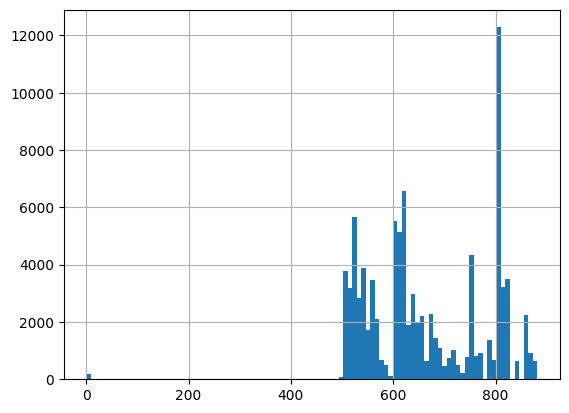

In [19]:
df.DMA.hist(bins=100)
plt.show()

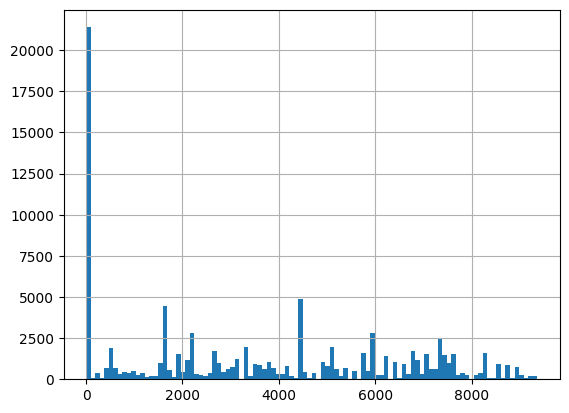

In [22]:
df.MSA.hist(bins=100)
plt.show()